<a href="https://colab.research.google.com/github/guilhermelaviola/DataScienceAreaAndPopulation/blob/main/BirthRateAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the necessary libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Importing the dataset:
births = pd.read_csv('births.csv')
print(births.head())

   year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548


In [3]:

births['day'].fillna(0, inplace = True)
births['day'].astype(int)

0        1
1        1
2        2
3        2
4        3
        ..
15542    0
15543    0
15544    0
15545    0
15546    0
Name: day, Length: 15547, dtype: int64

In [4]:
# Comparing numbers of males and females classified by decades:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births',
                   index = 'decade',
                   columns = 'gender',
                   aggfunc = 'sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


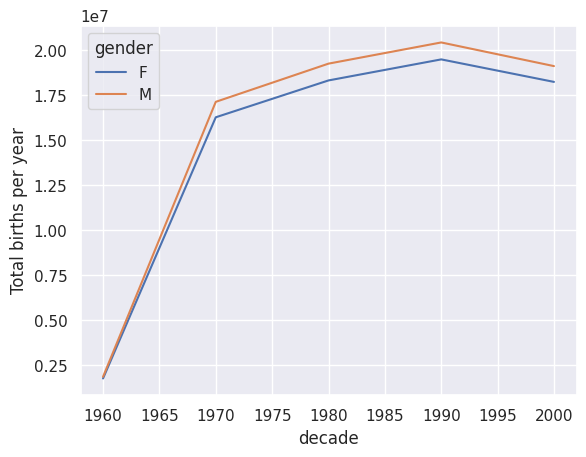

In [5]:
# Displaying the trend mentioned above with a graph:
sns.set()
birth_decade = births.pivot_table('births',
                                  index = 'decade',
                                  columns = 'gender',
                                  aggfunc = 'sum')
birth_decade.plot()
plt.ylabel('Total births per year')
plt.show()

In [6]:
# Cleaning the data by removing outliers caused by mistyped dates
# or missing values.
# Cutting the outliers, with a robust sigma-clipping operation:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [10]:
# Robust estimate of the sample mean, where the 0.74 comes from the interquartile range of the Gaussian distribution:
# Using the query() method to filter out rows with borths outside these values:
births = births.query('(births > @mu -5 * @sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format = '%Y%m%d')

births['dayofweek'] = births.index.day_of_week

<ipython-input-11-e15198cb8a27>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon',


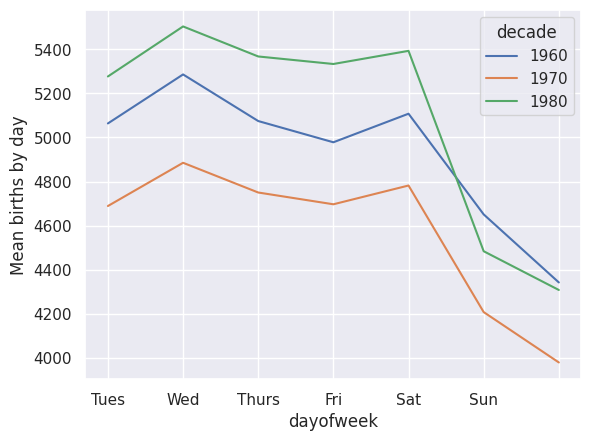

In [11]:
# Ploting births by weekday for several decades:
births.pivot_table('births',
                   index = 'dayofweek',
                   columns = 'decade',
                   aggfunc = 'mean').plot()
plt.gca().set_xticklabels(['Mon',
                           'Tues',
                           'Wed',
                           'Thurs',
                           'Fri',
                           'Sat',
                           'Sun'])
plt.ylabel('Mean births by day')
plt.show()

In [27]:
# Ploting the mean number of births by the day of the year.
# First we group the data by month and day separately:
births_month = births.pivot_table('births', [births.index.month,
                                             births.index.day])
print(births_month.head())

births_month.index = [pd.datetime(2016, month, day)
                      for (month, day) in births_month.index]
print(births_month.head())

       births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625
              births
2016-01-01  4009.225
2016-01-02  4247.400
2016-01-03  4500.900
2016-01-04  4571.350
2016-01-05  4603.625


<ipython-input-27-9dacae916745>:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_month.index = [pd.datetime(2016, month, day)


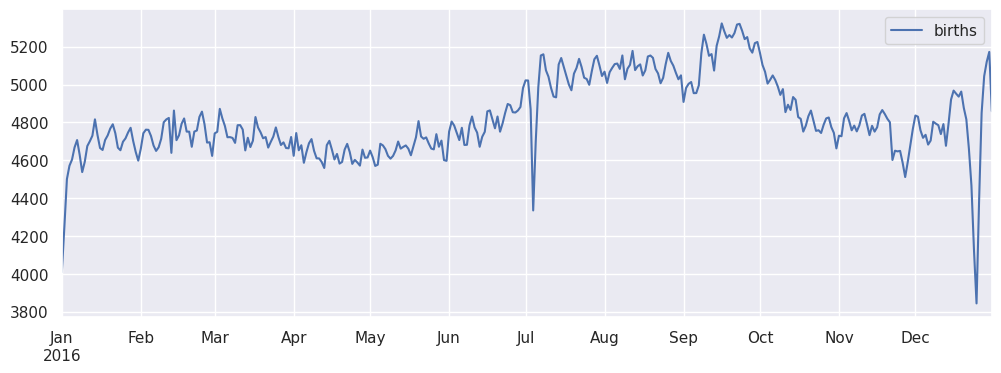

In [28]:
# Ploting the data:
fig, ax = plt.subplots(figsize = (12, 4))
births_month.plot(ax = ax)
plt.show()